In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

import torchvision.transforms as T

import matplotlib.pyplot as plt

import random
import numpy as np

from tqdm import tqdm

import pandas as pd

In [2]:
class MyModel(nn.Module):
    def __init__(self) -> None:
        super(MyModel, self).__init__()
        self.linear1 = nn.Linear(128, 128, bias=False)
        self.linear2 = nn.Linear(128, 16, bias=False)
        self.linear3 = nn.Linear(16, 1, bias=False)
        # self.linear2 = nn.Linear(64, 1, bias=False)

    def forward(self, x):

        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)

        return x

torch.manual_seed(22)    
model = MyModel()

In [3]:
data = pd.read_csv('data.csv')
data = data.to_numpy()
data = torch.tensor(data, dtype=torch.float32)

In [4]:

res = np.zeros((128,128), dtype=np.float32)
for i in tqdm(range(128)):
    for j in range(128):
        n = i*128 + j
        x = data[n:n+1, :]
        model.zero_grad()
        out = model(x)
        out.backward()
        g = list(model.parameters())[0].grad[i, j].item()
        res[i, j] = g

100%|██████████| 128/128 [00:12<00:00,  9.88it/s]


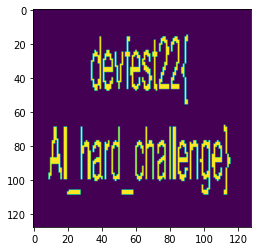

In [10]:
plt.imshow(res > 0)